## Recurrent Neural Network

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing the Data Set

In [22]:
dataset_train = pd.read_csv("C:\\Users\\5CD1478RQY!\\Downloads\\Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

#### Feature Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
sc = MinMaxScaler(feature_range = (0, 1)) ## Range is (0,1) because the Normalization lies in the range of 0,1
training_set_scaled = sc.fit_transform(training_set) ## Advisable not to attempt the changes in the original dataset
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

#### Creating a dataset with 60 timesteps and 1 output which means each timestep represents a discrete point in time within the sequence. In this context, 60 timesteps mean you have data from 60 consecutive time points.

In [25]:
## Creating two empty lists
X_train = []  ## It will contain the input of the neural network
Y_train = []  ## It will contain the output of the neural network
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    Y_train.append(training_set_scaled[i,0])
X_train , Y_train = np.array(X_train), np.array(Y_train)


In [26]:
total_values_Y_train = Y_train.size
print(f"Total number of values in Y_train: {total_values_Y_train}")


Total number of values in Y_train: 1198


##### Reshaping

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) ## To know the order of dimensions use keras libraryx

In [28]:
X_train.shape

(1198, 60, 1)

#### Importing the Keras libraries and Packages

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### Initializing the RNN

In [30]:
regressor = Sequential()

#### Adding the first layer of LSTM and other Regularisations

In [31]:
regressor.add(LSTM(units = 50 , return_sequences = True, input_shape = (X_train.shape[1], 1) )) # Number of neurons selected 50
regressor.add(Dropout(0.2))

#### Adding Second Layer of LSTM and other Regularisation

In [32]:
regressor.add(LSTM(units = 50 , return_sequences = True, input_shape = (X_train.shape[1], 1) )) # Number of neurons selected 50
regressor.add(Dropout(0.2))

#### Adding Third Layer of LSTM and other Regularisation

In [33]:
regressor.add(LSTM(units = 50 , return_sequences = True, input_shape = (X_train.shape[1], 1) )) # Number of neurons selected 50
regressor.add(Dropout(0.2))

#### Adding Fourth Layer of LSTM and other Regularisation

In [34]:
regressor.add(LSTM(units = 50 , return_sequences = False, input_shape = (X_train.shape[1], 1) )) # Number of neurons selected 50
regressor.add(Dropout(0.2))

#### Output Layer

In [35]:
regressor.add(Dense(units = 1)) ## Unit should be the dimension of oitput, in this case it is 1 i.e stock

## Till now we have done the Architecture of RNN

#### Compiling the RNN

In [36]:
regressor.compile(optimizer= 'adam',loss = 'mean_squared_error')   ## Adding optimizer and

### Making the predictions and visualizing the output

In [40]:
## Fitting the RNN to the training set
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0014
Epoch 2/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0013
Epoch 3/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0013
Epoch 4/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0013
Epoch 5/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0013
Epoch 6/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0013
Epoch 7/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0013
Epoch 8/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0013
Epoch 9/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0013
Epoch 10/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0015
Epoch 11/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0012
Epoch 12/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0012
Epoch 13/100


#### Importing the Test Data

In [41]:
dataset_test = pd.read_csv("C:\\Users\\5CD1478RQY!\\Downloads\\Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [54]:
## Getting the Predicted Stock Price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values ##  Gives the lower bound data
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []  ## It will contain the input of the neural network
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) ## To know the order of dimensions use keras libraryx
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 46ms/step


In [55]:
predicted_stock_price

array([[788.0985 ],
       [786.0938 ],
       [792.2643 ],
       [791.27814],
       [796.33734],
       [804.948  ],
       [806.5672 ],
       [804.2792 ],
       [806.3007 ],
       [807.8821 ],
       [807.85486],
       [806.96234],
       [806.706  ],
       [808.28656],
       [808.8529 ],
       [819.20386],
       [825.21466],
       [830.5169 ],
       [829.00226],
       [816.21814]], dtype=float32)

#### Visualizing the Results

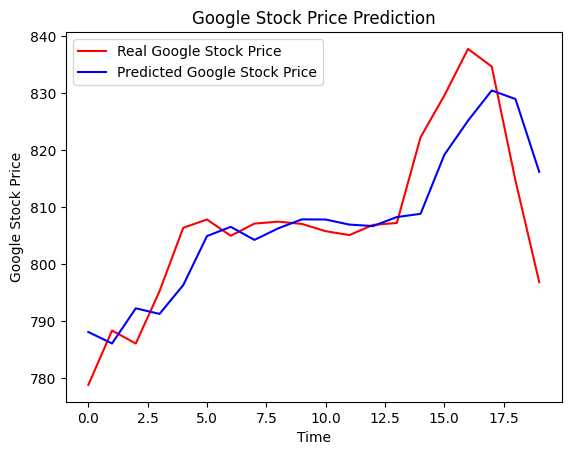

In [57]:
plt.plot(real_stock_price, color= 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color= 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()